# Obesity Dataset



In [15]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV into a pandas DataFrame
file_path = r"C:\Users\Brian\Documents\Learning\UofT Data Science\Team Project\Obesity-Risk-Scoring-Enhancing-Health-Insurance-Plans\Brian Ngo\data\raw\ObesityDataSet.csv"
data = pd.read_csv(file_path)

print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
print(data.columns)
print(data.info())


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   S

In [6]:
print(data.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
# Connect to SQLite
conn = sqlite3.connect('obesity_data.db')

# Save the dataset to SQLite
data.to_sql('obesity_dataset', conn, if_exists='replace', index=False)

2111

In [21]:
# Group by 'NObeyesdad' and count the occurrences
NObeyesdad_count = data.groupby('NObeyesdad').size().reset_index(name='count')

# Display the result
print(NObeyesdad_count)

            NObeyesdad  count
0  Insufficient_Weight    272
1        Normal_Weight    287
2       Obesity_Type_I    351
3      Obesity_Type_II    297
4     Obesity_Type_III    324
5   Overweight_Level_I    290
6  Overweight_Level_II    290


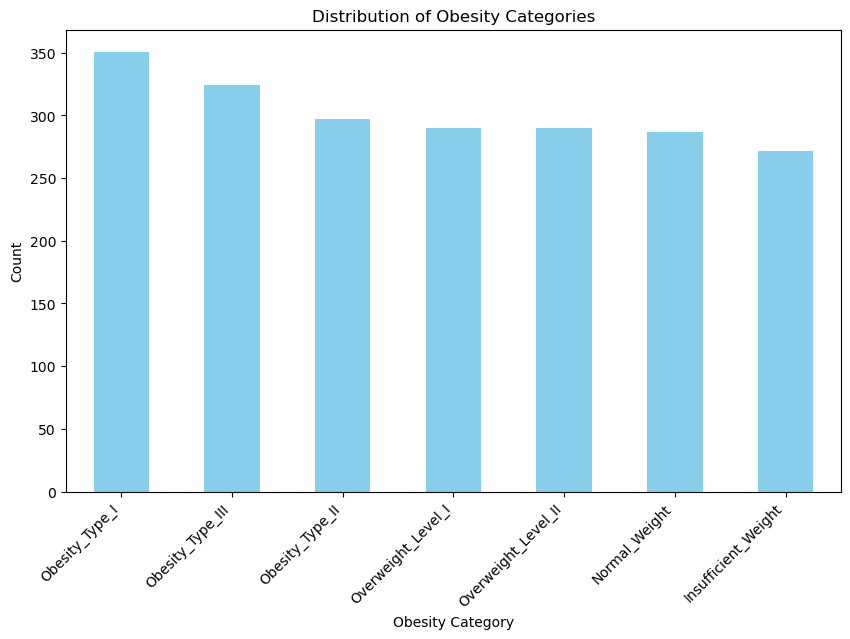

In [9]:
import matplotlib.pyplot as plt

# Count obesity categories
category_counts = data['NObeyesdad'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Obesity Categories')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


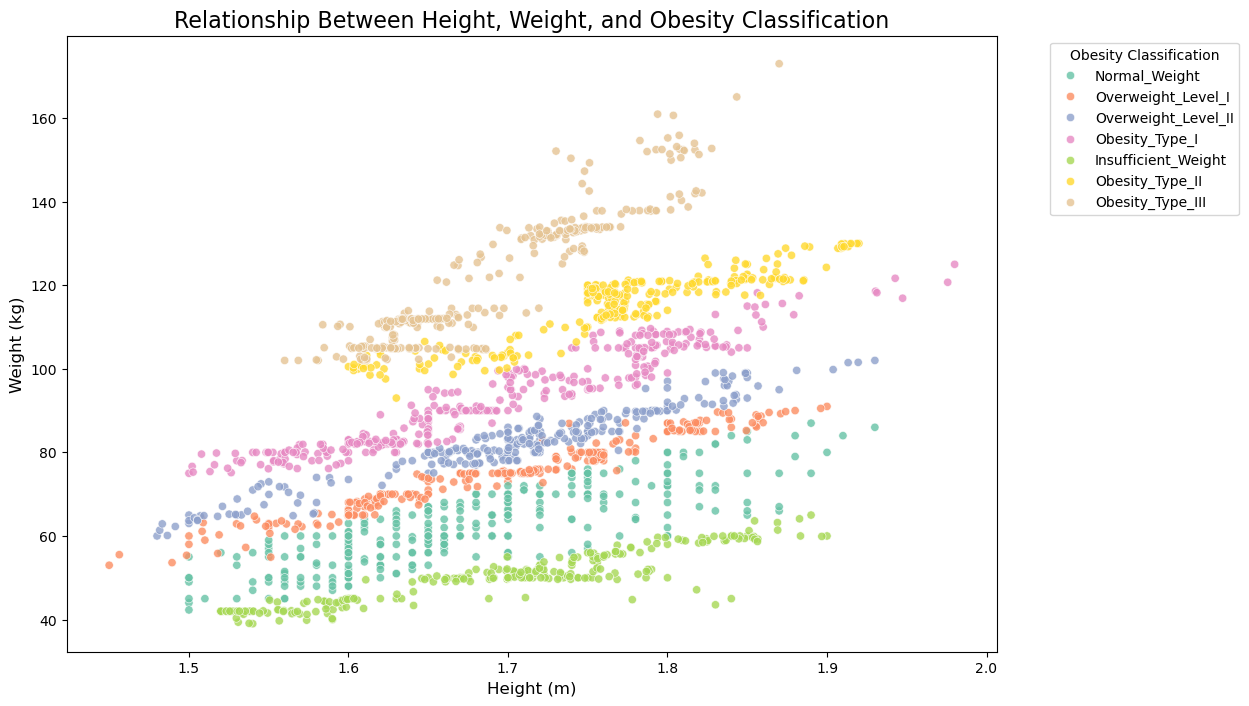

In [19]:
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    x='Height', 
    y='Weight', 
    hue='NObeyesdad', 
    data=data, 
    palette='Set2', 
    alpha=0.8
)

# Titles and labels
plt.title('Relationship Between Height, Weight, and Obesity Classification', fontsize=16)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.legend(title='Obesity Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
